Apply Data Cleaning to the Datasets and then apply k-means, Agglomerative clustering to 
find pattern and the best value for the following features.
Build a classification model on k-means, agglomerative clustering


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('column_2C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
df.shape

(310, 7)

In [4]:
for col in df.columns:
    df.loc[df['class']=='Abnormal','class']=0
    df.loc[df['class']=='Normal','class']=0

In [5]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [6]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [8]:
df.skew()

pelvic_incidence            0.520440
pelvic_tilt numeric         0.676553
lumbar_lordosis_angle       0.599451
sacral_slope                0.792577
pelvic_radius              -0.176835
degree_spondylolisthesis    4.317954
class                       0.000000
dtype: float64

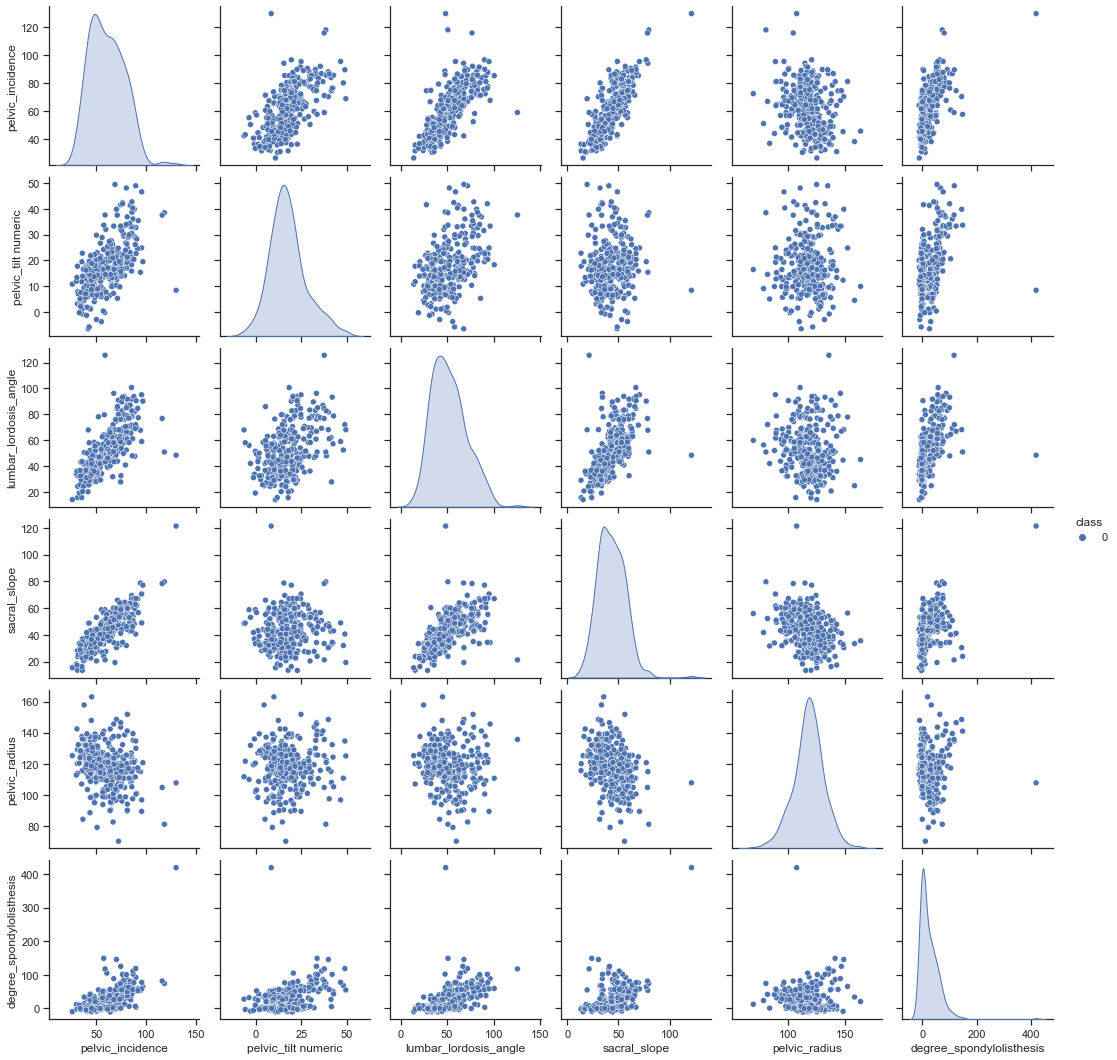

In [9]:
sns.pairplot(df,hue='class')

<AxesSubplot:>

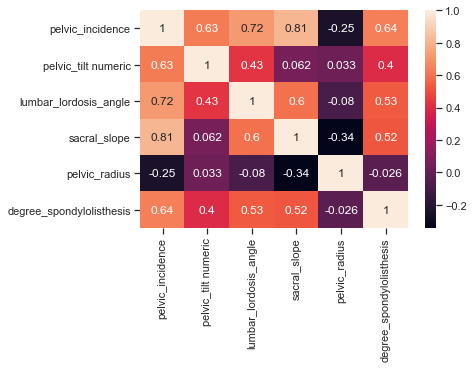

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
#sacralslope and pelv_in
#drop pelvic_incidence

In [12]:
x=df.drop('class',axis=1)
y=df['class']

In [13]:
from  sklearn.preprocessing import StandardScaler,PowerTransformer

sc=StandardScaler()
data_sc=pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [14]:
from sklearn.cluster import KMeans

wcss=[]
r=range(1,15)
for k in r:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data_sc)
    wcss.append(kmeans.inertia_)
error=pd.DataFrame({'No':r,'error':wcss})
error

,No,error
0,1,1860.000000
1,2,1151.890555
2,3,929.762786
3,4,803.499634
4,5,711.494324
5,6,632.681811
6,7,579.659708
7,8,536.523079
8,9,503.348159
9,10,480.370635


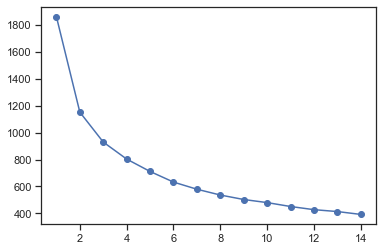

In [15]:
plt.plot(r,wcss,marker='o')

In [16]:
#optimal either 2 or 3

In [17]:
from sklearn.metrics import silhouette_score
c=[2,3,4,5,6,7,8]


for j in c:
    cluster= KMeans(n_clusters=j)
    label=cluster.fit_predict(data_sc)
    score=silhouette_score(data_sc,label,random_state=10)
    print('the score of ',j,'is',score)


the score of  2 is 0.3629017847276513
the score of  3 is 0.2942357195625465
the score of  4 is 0.2607472833055275
the score of  5 is 0.27052949577291885
the score of  6 is 0.22759816974419741
the score of  7 is 0.2058867258467291
the score of  8 is 0.20269978499218824


In [18]:
#k=2

In [19]:
kmeans=KMeans(n_clusters=2)
label_k=kmeans.fit_predict(data_sc)

In [20]:
df_k=data_sc.copy()
df_k['label1']=label_k
df_k.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,label1
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,1
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1


In [22]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from scipy.spatial.distance import pdist

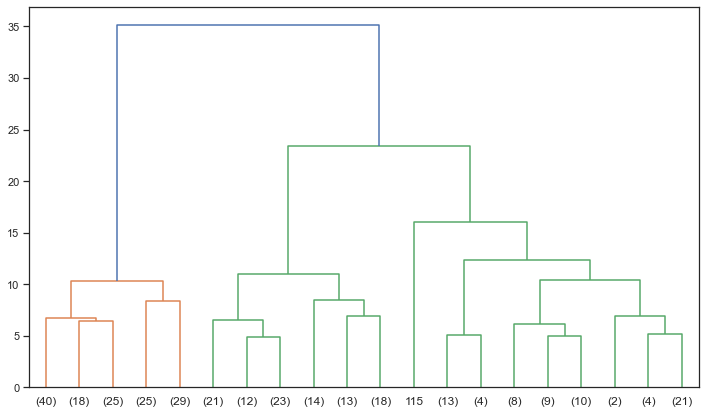

In [24]:
plt.figure(figsize=(12,7))
z_ward = linkage(data_sc,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

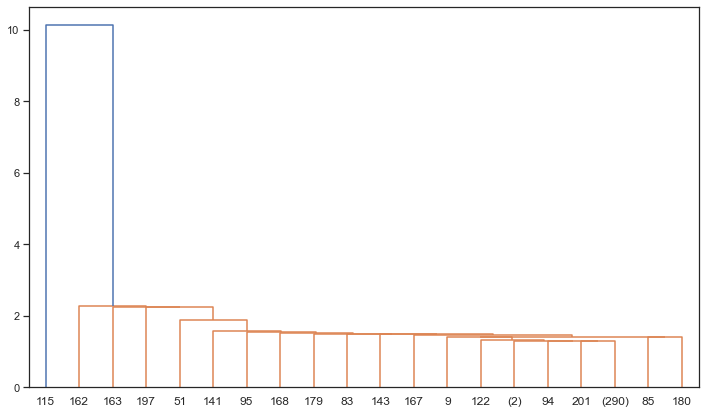

In [25]:
plt.figure(figsize=(12,7))
z_single = linkage(data_sc,method='single')
dendrogram(z_single,truncate_mode='lastp',p=20)
plt.show()

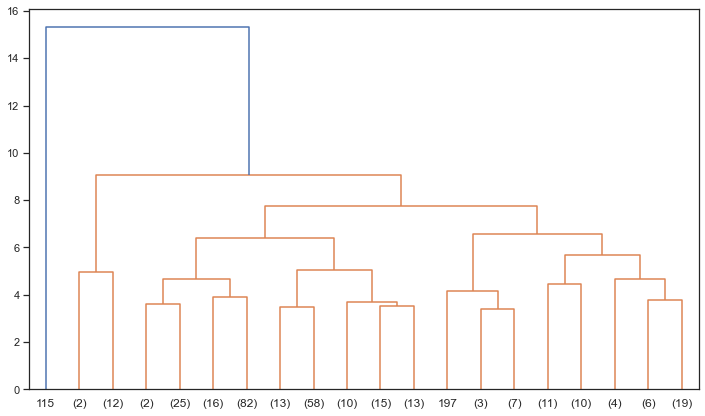

In [26]:
plt.figure(figsize=(12,7))
z_complete = linkage(data_sc,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

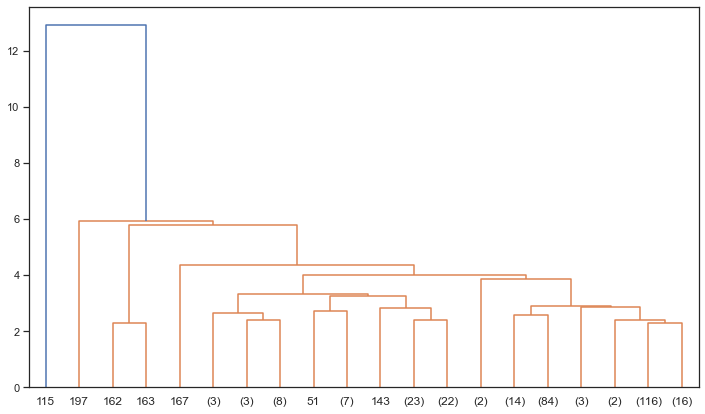

In [27]:
plt.figure(figsize=(12,7))
z_avg = linkage(data_sc,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

In [31]:
link=['single','complete','average','ward','centroid']
for l in link:
    Z = linkage(data_sc, method = l)
    c, coph_dist = cophenet(Z, pdist(data_sc))
    print('Cophenetic value for ', l , 'is: ', c)
#as we ahve seen the Cophenetic score for avearge linkage method is high, 
#so we can consider for model building

Cophenetic value for  single is:  0.6733779824460394
Cophenetic value for  complete is:  0.7100770377450585
Cophenetic value for  average is:  0.8102695344031378
Cophenetic value for  ward is:  0.48007419081723585
Cophenetic value for  centroid is:  0.8090969535047989


# AgglomerativeClustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
agg = AgglomerativeClustering(n_clusters=2,linkage='average')
agg.fit(data_sc)
agg.labels_
#note majority is giving class labels as 0, this can be true as 
#we have data imbalnce,lets check with other methods

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
agg = AgglomerativeClustering(n_clusters=2,linkage='ward')
agg.fit(data_sc)
agg_lables_h = agg.labels_

In [40]:
df_h = data_sc.copy()
df_h['Lables_h'] = agg_lables_h
df_h.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Lables_h
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1


In [41]:
df['class'].value_counts()/len(df)*100

0    100.0
Name: class, dtype: float64

In [45]:
df_k['label1'].value_counts()/len(df)*100

1    59.354839
0    40.645161
Name: label1, dtype: float64

In [46]:
df_h['Lables_h'].value_counts()/len(df)*100

0    55.806452
1    44.193548
Name: Lables_h, dtype: float64

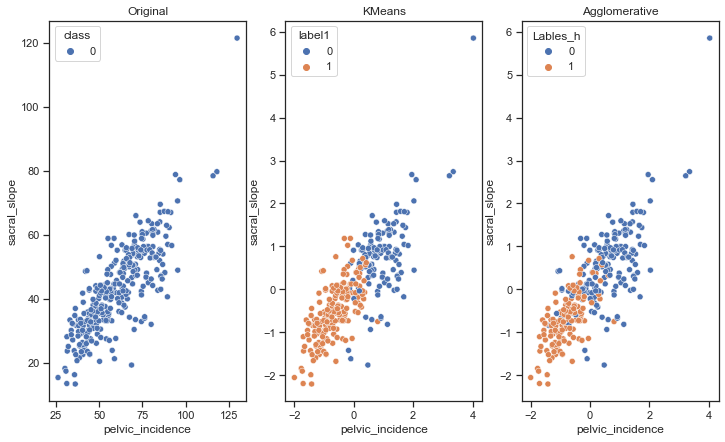

In [56]:
plt.rcParams['figure.figsize'] = (12,7)
plt.subplot(1,3,1)
plt.title('Original')
sns.scatterplot(x='pelvic_incidence',y='sacral_slope',hue='class',data=df)
plt.subplot(1,3,2)
plt.title('KMeans')
sns.scatterplot(x='pelvic_incidence',y='sacral_slope',hue='label1',data=df_k)
plt.subplot(1,3,3)
plt.title('Agglomerative')
sns.scatterplot(x='pelvic_incidence',y='sacral_slope',hue='Lables_h',data=df_h)
plt.show()

# SLC MODEL BUILDNG

In [57]:
x = df_h.drop('Lables_h',axis=1)
y = df_h.Lables_h
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [58]:
dt = DecisionTreeClassifier()
model_agg = dt.fit(x_train,y_train)
ypred_h_agg = model_agg.predict(x_test)
print('accuracy_score of the model is ',accuracy_score(y_test,ypred_h_agg))
print('classification_report of the model is')
print(classification_report(y_test,ypred_h_agg))

accuracy_score of the model is  0.9354838709677419
classification_report of the model is
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.92      0.92      0.92        25

    accuracy                           0.94        62
   macro avg       0.93      0.93      0.93        62
weighted avg       0.94      0.94      0.94        62



In [59]:
ypred_train_agg = model_agg.predict(x_train)
print('accuracy_score of the model is ',accuracy_score(y_train,ypred_train_agg))
#train accuracy is 100 and test accuracy is 94%, which is quite good

accuracy_score of the model is  1.0


# Random Forest

In [60]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
ypred_h_rf = model_rf.predict(x_test)
print('accuracy_score of the model is ',accuracy_score(y_test,ypred_h_rf))
print('classification_report of the model is')
print(classification_report(y_test,ypred_h_rf))

accuracy_score of the model is  0.967741935483871
classification_report of the model is
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.92      0.96        25

    accuracy                           0.97        62
   macro avg       0.97      0.96      0.97        62
weighted avg       0.97      0.97      0.97        62



In [61]:
ypred_train_rf = model_rf.predict(x_train)
print('accuracy_score of the model is ',accuracy_score(y_train,ypred_train_rf))

accuracy_score of the model is  1.0


In [63]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [64]:
ada = AdaBoostClassifier(n_estimators=50)
model_ada = ada.fit(x_train,y_train)
ypred_h_ada = model_ada.predict(x_test)
print('accuracy_score of the model is ',accuracy_score(y_test,ypred_h_ada))
print('classification_report of the model is')
print(classification_report(y_test,ypred_h_ada))

accuracy_score of the model is  0.9838709677419355
classification_report of the model is
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.96      0.98        25

    accuracy                           0.98        62
   macro avg       0.99      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [65]:
ypred_train_ada = model_ada.predict(x_train)
print('accuracy_score of the model is ',accuracy_score(y_train,ypred_train_ada))

accuracy_score of the model is  1.0


In [66]:
#train accuracy is 100 and test accuracy is 98%, which is even better compared to
# decision Tree,Random forest,
#Adaboost can be considered based on explanability of model and precision and recall values

In [67]:
gb = GradientBoostingClassifier(n_estimators=50)
model_gb = gb.fit(x_train,y_train)
ypred_h_gb = model_gb.predict(x_test)
print('accuracy_score of the model is ',accuracy_score(y_test,ypred_h_gb))
print('classification_report of the model is')
print(classification_report(y_test,ypred_h_gb))

accuracy_score of the model is  1.0
classification_report of the model is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        25

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [68]:
ypred_train_gb = model_gb.predict(x_train)
print('accuracy_score of the model is ',accuracy_score(y_train,ypred_train_gb))

accuracy_score of the model is  1.0
